In [1]:
import sys
sys.path.append('..')
import umbrella_mesh
import elastic_rods
import linkage_vis
from umbrella_mesh import UmbrellaEnergyType
from elastic_rods import EnergyType
from bending_validation import suppress_stdout as so

In [2]:
import numpy as np

In [3]:
input_path = '../../data/sphere_cap_0.3.json'
# input_path = '../../data/hemisphere.json'
from load_jsondata import read_data
input_data, io = read_data(filepath = input_path)
import mesh
target_mesh = mesh.Mesh(input_data['target_v'], input_data['target_f'])

### Initialization

In [4]:
curr_um = umbrella_mesh.UmbrellaMesh(io)
thickness = io.material_params[6]
curr_um.targetDeploymentHeight = thickness

In [5]:
curr_um.energy(UmbrellaEnergyType.Elastic)

7.923015724750786e-28

In [6]:
curr_um.set_design_parameter_config(True, False)

In [7]:
# curr_um.gradient(variableDesignParameters = True, designParameterOnly = False)

### Parameters

In [8]:
curr_um.uniformDeploymentEnergyWeight = 1e-3
curr_um.targetDeploymentHeight = thickness * 1

In [9]:
view = linkage_vis.LinkageViewer(curr_um, width=1024, height=600)
view.averagedMaterialFrames = True
view.show()

Renderer(camera=PerspectiveCamera(aspect=1.7066666666666668, children=(PointLight(color='#999999', position=(0…

In [10]:
curr_um.hessian(variableDesignParameters = True)

### Hessian Validation

In [11]:
curr_um.updateSourceFrame()

In [12]:
curr_um.hessianSparsityPattern()

In [13]:
curr_um.hessian()

In [14]:
import umbrella_finite_diff

In [15]:
import importlib
importlib.reload(umbrella_finite_diff)

<module 'umbrella_finite_diff' from '/Users/jpanetta/Research/UmbrellaMesh/python/tests/../umbrella_finite_diff.py'>

In [16]:
perturbation = np.random.uniform(-1e-3, 1e-3, curr_um.numDoF())

In [17]:
dof = curr_um.getDoFs()

In [18]:
import copy

In [19]:
curr_um.setDoFs(dof + perturbation)
# curr_um.setDoFs(perturbation_along_segment_dof)

In [20]:
view.update()

In [21]:
curr_um.uniformDeploymentEnergyWeight = 1e-3

In [22]:
curr_um.targetDeploymentHeight = thickness

In [23]:
curr_um.updateSourceFrame()

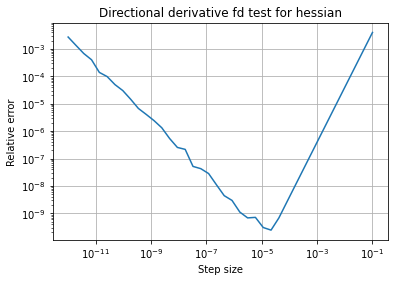

In [24]:
umbrella_finite_diff.hessian_convergence_plot(curr_um, umbrellaEnergyType=umbrella_mesh.UmbrellaEnergyType.Deployment, etype=elastic_rods.EnergyType.Full, maxStepSize=1e-1, variableDesignParameters=True, perArmRestLen=True)

In [25]:
direction = np.random.uniform(-1e-3, 1e-3, curr_um.numExtendedDoFPARL())

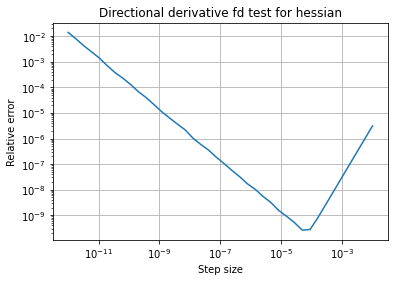

In [26]:
umbrella_finite_diff.hessian_convergence_plot(curr_um, umbrellaEnergyType=umbrella_mesh.UmbrellaEnergyType.Elastic, etype=elastic_rods.EnergyType.Full, variableDesignParameters=True, direction = direction, perArmRestLen=True)

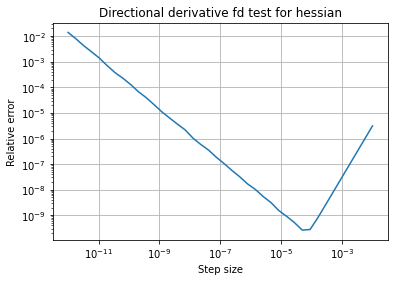

In [27]:
umbrella_finite_diff.hessian_convergence_plot(curr_um, umbrellaEnergyType=umbrella_mesh.UmbrellaEnergyType.Elastic, etype=elastic_rods.EnergyType.Full, variableDesignParameters=False, direction = direction[:curr_um.numDoF()])

In [28]:
var_types = ['FULL', 'RodSegment', 'Joint']
var_indices = {'FULL': range(0, curr_um.numDoF()),
               'RodSegment': range(0, curr_um.dofOffsetForJoint(0)),
               'Joint': range( curr_um.dofOffsetForJoint(0), curr_um.numDoF())}

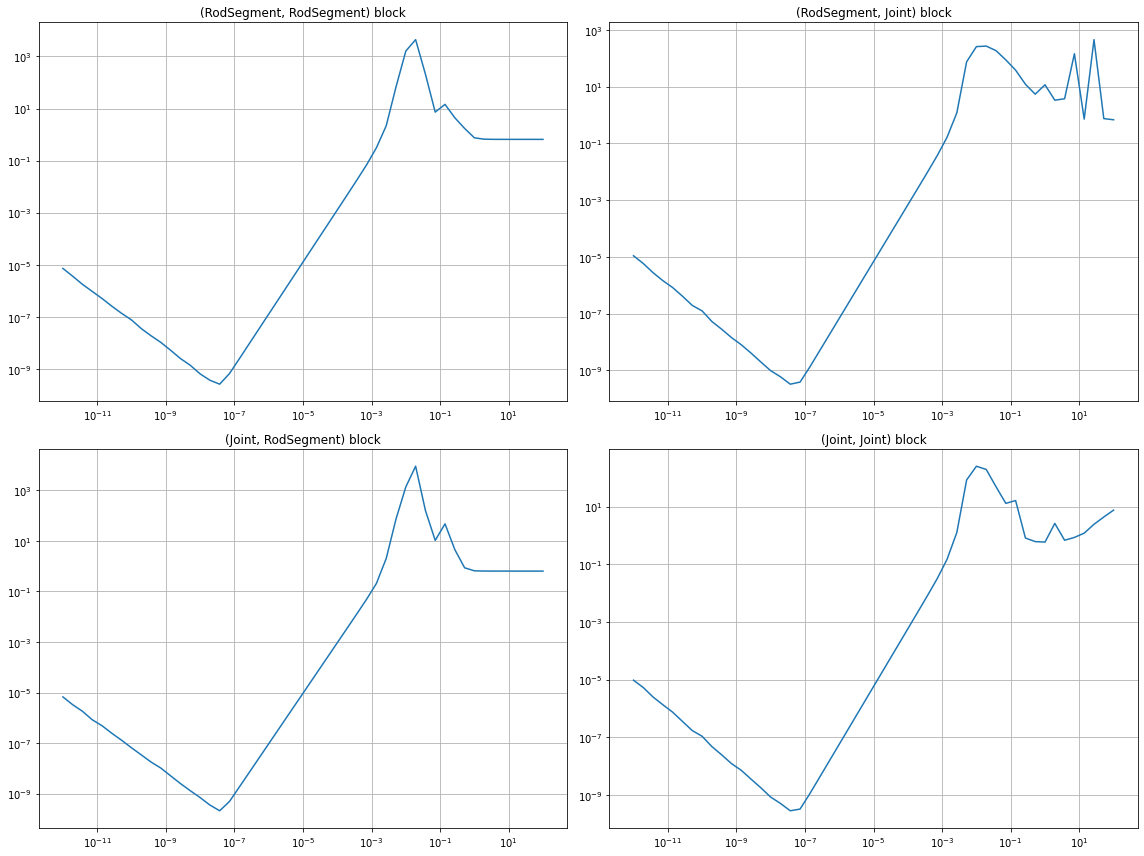

In [29]:
umbrella_finite_diff.hessian_convergence_block_plot(curr_um, var_types, var_indices, umbrellaEnergyType=umbrella_mesh.UmbrellaEnergyType.Full, etype=elastic_rods.EnergyType.Full, variableDesignParameters=True, perArmRestLen=True)

In [30]:
position_indices = [np.arange(curr_um.dofOffsetForJoint(i), curr_um.dofOffsetForJoint(i) + 3) for i in range(curr_um.numJoints())]
position_indices = np.array(position_indices).flatten()

omega_indices = [np.arange(curr_um.dofOffsetForJoint(i) + 3, curr_um.dofOffsetForJoint(i) + 6) for i in range(curr_um.numJoints())]
omega_indices = np.array(omega_indices).flatten()

alpha_indices = [np.arange(curr_um.dofOffsetForJoint(i) + 6, curr_um.dofOffsetForJoint(i) + 7) for i in range(curr_um.numJoints())]
alpha_indices = np.array(alpha_indices).flatten()

length_indices = []
for i in range(curr_um.numJoints()):
    length_indices += list(np.arange(curr_um.dofOffsetForJoint(i) + 7, curr_um.dofOffsetForJoint(i) + curr_um.joint(i).numDoF()))
length_indices = np.array(length_indices)

In [31]:
var_types = ['position', 'omega', 'alpha', 'length']
var_indices = {'position': position_indices,
               'omega': omega_indices,
               'alpha': alpha_indices,
               'length': length_indices}

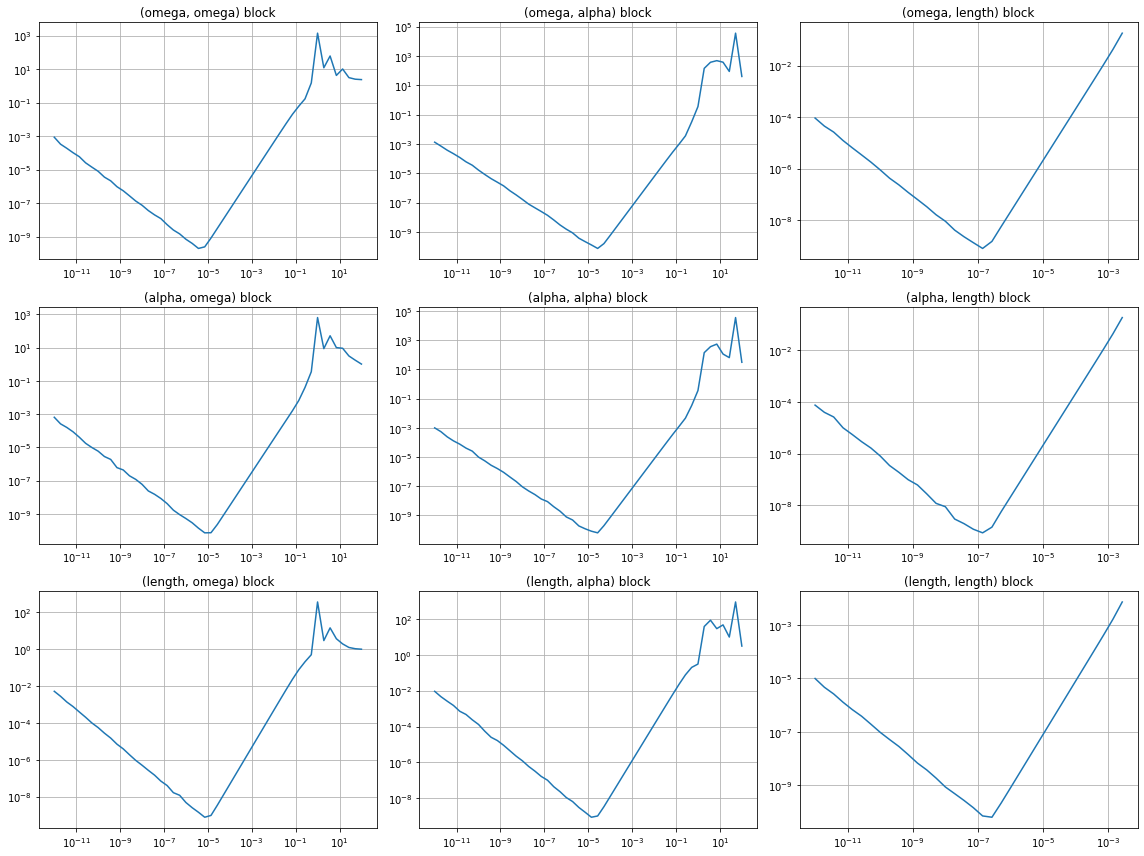

In [32]:
umbrella_finite_diff.hessian_convergence_block_plot(curr_um, var_types, var_indices, umbrellaEnergyType=umbrella_mesh.UmbrellaEnergyType.Full, etype=elastic_rods.EnergyType.Full, perArmRestLen=True)